Reference
1. [EDA] https://www.kaggle.com/code/bandiatindra/telecom-churn-prediction
1. Notion for modelling use xgboost in the end
1. feat selection and importance

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Check nans

In [6]:
nan_cols_series = df.isna().any()
nan_cols_series

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [7]:
nan_cols_series[nan_cols_series]

Series([], dtype: bool)

There are no nans present in the dataset

# Monovariate analysis

## customerID

In [8]:
# check if ids are unique
assert df["customerID"].nunique() == df.shape[0]

## Gender

Whether the customer is a male or a female

In [9]:
df["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

gender has 2 unique values, 
number of males and females in gender are more or less equal



## SeniorCitizen

Whether the customer is a senior citizen or not (1, 0)

In [10]:
df["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

We can see that `SeniorCitizen` is boolean and there is an imbalance in the distribution of the same

## Partner

Whether the customer has a partner or not (Yes, No)

In [11]:
df["Partner"].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

We can see that `Partner` is almost equally distributed in Yes and No

## Dependents

Whether the customer has dependents or not (Yes, No)



In [12]:
df["Dependents"].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

We can see that `Dependents` is slightly imbalanced in nature, and has 2 unique values

## tenure

Number of months the customer has stayed with the company



In [13]:
df["tenure"].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

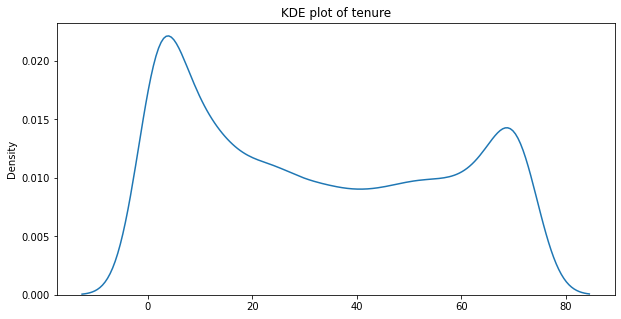

In [14]:
plt.figure(figsize=[10, 5])
plt.title("KDE plot of tenure")
sns.kdeplot(df["tenure"].values)
plt.show()

1. We can see that tenure distribution is slightly peaked in 2 regions
1. peak 1 : region between 0-20
1. peak 2 : region between 60-80

## PhoneService
Whether the customer has a phone service or not (Yes, No)

In [15]:
df["PhoneService"].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

1. We can see that there is high imbalance in boolean variable `PhoneService`

## MultipleLines
Whether the customer has multiple lines or not (Yes, No, No phone service)

In [16]:
df["MultipleLines"].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

1. we can see that `MultipleLines` is a categorical variable
1. Yes and No are almost evenly distributed
1. we can see that No phone service is comparatively lower in occurence

## InternetService
Customer’s internet service provider (DSL, Fiber optic, No)

In [17]:
df["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

1. We can see that `InternetService` is categorical in nature
1. Fiber optic has highest occurence followed by DSL and No

## OnlineSecurity
Whether the customer has online security or not (Yes, No, No internet service)

In [18]:
df["OnlineSecurity"].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

1. We can see that `OnlineSecurity` has 3 unique categories
1. Occurences and their order can be observed in the above table

## OnlineBackup
Whether the customer has online backup or not (Yes, No, No internet service)

In [19]:
df["OnlineBackup"].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

1. We can see that `OnlineBackup` has 3 unique categories
1. Occurences and their order can be observed in the above table

## DeviceProtection
Whether the customer has device protection or not (Yes, No, No internet service)

In [20]:
df["DeviceProtection"].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

1. We can see that `DeviceProtection` has 3 unique categories
1. Occurences and their order can be observed in the above table

## TechSupport
Whether the customer has tech support or not (Yes, No, No internet service)

In [21]:
df["TechSupport"].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

1. We can see that `TechSupport` has 3 unique categories
1. Occurences and their order can be observed in the above table

## StreamingTV
Whether the customer has streaming TV or not (Yes, No, No internet service)

In [22]:
df["StreamingTV"].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

1. We can see that `StreamingTV` has 3 unique categories
1. Occurences and their order can be observed in the above table

## StreamingMovies
Whether the customer has streaming movies or not (Yes, No, No internet service)

In [23]:
df["StreamingMovies"].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

1. We can see that `StreamingMovies` has 3 unique categories
1. Occurences and their order can be observed in the above table

## Contract
The contract term of the customer (Month-to-month, One year, Two year)

In [24]:
df["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

1. We can see that `Contract` has 3 unique categories
1. We can see that most of the people have month to month contract
1. People having 1 or 2 year contract are comparatively lesser

## PaperlessBilling
Whether the customer has paperless billing or not (Yes, No)

In [25]:
df["PaperlessBilling"].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

1. We can see that `PaperlessBilling` has a slight imbalance in distribution
1. PaperlessBilling is a boolean variable
1. We can see most of the customers in the dataset have PaperlessBilling

## PaymentMethod
The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

In [26]:
df["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

1. We can see that `PaymentMethod` is almost equally distributed amongst 3 categories
1. "Electronic check" seems to be a bit high in occurence as compared to rest of the categories

## MonthlyCharges
The amount charged to the customer monthly

In [27]:
df["MonthlyCharges"].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

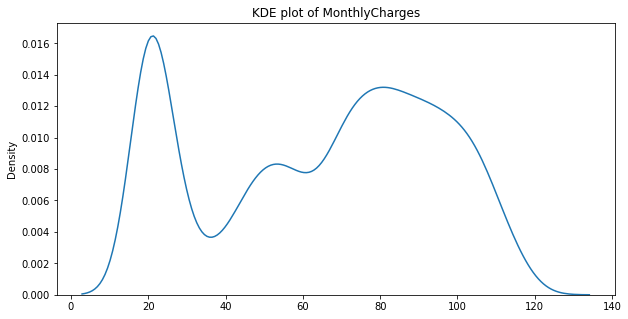

In [28]:
plt.figure(figsize=[10, 5])
plt.title("KDE plot of MonthlyCharges")
sns.kdeplot(df["MonthlyCharges"].values)
plt.show()

1. We can see that MonthlyCharges distribution is slightly peaked in 2 regions
1. peak 1 : region around 20
1. peak 2 : region around 80

## TotalCharges
The total amount charged to the customer

In [29]:
df["TotalCharges"].describe()

count     7043
unique    6531
top       20.2
freq        11
Name: TotalCharges, dtype: object

In [30]:
df[df["TotalCharges"] == " "].shape[0]

11

1. `NOTE` : the category "top" has missing values in the form of empty strings
1. As the number of missing values is very less we can fill the data with mean or median
1. In order to decide on choosing mean or median let us check the distribution of the data

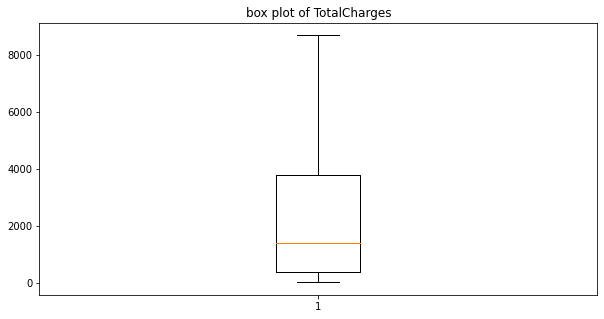

In [31]:
plt.figure(figsize=[10, 5])
plt.title("box plot of TotalCharges")
plt.boxplot(df["TotalCharges"][df["TotalCharges"] != " "].astype(float).values)
plt.show()

1. We can see that the TotalCharges is skewed in nature
1. Replacing `' '` i.e empty string with median of the column

In [32]:
np.median(df["TotalCharges"][df["TotalCharges"] != " "].astype(float))

1397.475

In [33]:
df.loc[df["TotalCharges"] == " ", "TotalCharges"] = np.median(
    df["TotalCharges"][df["TotalCharges"] != " "].astype(float)
)

In [34]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

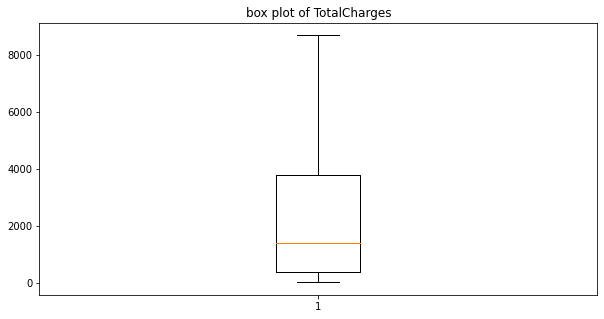

In [35]:
plt.figure(figsize=[10, 5])
plt.title("box plot of TotalCharges")
plt.boxplot(df["TotalCharges"][df["TotalCharges"] != " "].astype(float).values)
plt.show()

Rechecking the distribution, we can see it has not changed much from the actual distribution

1. We can see that MonthlyCharges distribution is slightly peaked in 2 regions
1. peak 1 : region around 20
1. peak 2 : region around 80

## Churn
Whether the customer churned or not (Yes or No)

In [36]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

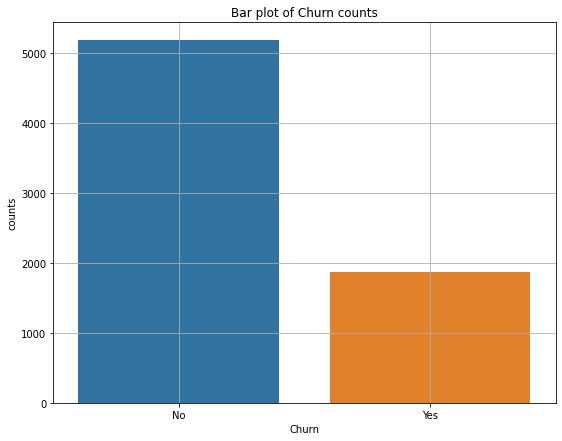

In [37]:
_ = (
    df["Churn"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "Churn", "Churn": "counts"})
).head(10)

plt.figure(figsize=[9, 7])
plt.title(f"Bar plot of Churn counts")
ax = sns.barplot(x="Churn", y="counts", data=_,)
plt.grid()
plt.show()

1. We can see that there is imbalance between distribution of `Churn`

In [38]:
os.makedirs("../data/cleaned/", exist_ok=True)

In [39]:
df.to_parquet("../data/cleaned/telcom-churn.parquet")

# column describe

Based on monovariate analysis we can create a feature dictionary describing types of variable we will encounter in further pipelines

In [40]:
os.makedirs("../data/feature-meta/cleaned/", exist_ok=True)

In [41]:
d = {
    "customerID": {"is_raw": True, "type": "ID"},
    "gender": {"is_raw": True, "var_type": "boolean", "value_type": "text"},
    "SeniorCitizen": {"is_raw": True, "var_type": "boolean", "value_type": "numeric"},
    "Partner": {"is_raw": True, "var_type": "boolean", "value_type": "text"},
    "Dependents": {"is_raw": True, "var_type": "boolean", "value_type": "text"},
    "tenure": {"is_raw": True, "var_type": "real", "value_type": "numeric"},
    "PhoneService": {"is_raw": True, "var_type": "boolean", "value_type": "text"},
    "MultipleLines": {"is_raw": True, "var_type": "categorical", "value_type": "text"},
    "InternetService": {
        "is_raw": True,
        "var_type": "categorical",
        "value_type": "text",
    },
    "OnlineSecurity": {"is_raw": True, "var_type": "categorical", "value_type": "text"},
    "OnlineBackup": {"is_raw": True, "var_type": "categorical", "value_type": "text"},
    "DeviceProtection": {
        "is_raw": True,
        "var_type": "categorical",
        "value_type": "text",
    },
    "TechSupport": {"is_raw": True, "var_type": "categorical", "value_type": "text"},
    "StreamingTV": {"is_raw": True, "var_type": "categorical", "value_type": "text"},
    "StreamingMovies": {
        "is_raw": True,
        "var_type": "categorical",
        "value_type": "text",
    },
    "Contract": {"is_raw": True, "var_type": "categorical", "value_type": "text"},
    "PaperlessBilling": {"is_raw": True, "var_type": "boolean", "value_type": "text"},
    "PaymentMethod": {"is_raw": True, "var_type": "categorical", "value_type": "text"},
    "MonthlyCharges": {"is_raw": True, "var_type": "real", "value_type": "numeric"},
    "TotalCharges": {
        "is_raw": True,
        "var_type": "real",
        "value_type": "numeric",
        "cleaned": True,
    },
    "Churn": {"is_raw": True, "var_type": "categorical", "value_type": "boolean",},
}

In [42]:
import json

with open("../data/feature-meta/cleaned/meta.json", "w") as f:
    json.dump(d, f, indent=2)